## Sharpening

<p style='direction:rtl; text-align: right'>
برای شارپ‌تر کردن تصویر، با استفاده از لاپلاسین تصویر، یک فیلتر آنشارپ می‌سازیم و سپس با انتخاب ضریب مناسب،
آن را با کل تصویر جمع میکنیم.
البته از آنجایی که لاپلاسین به نویز حساس است، قبل از گرفتن لاپلاسین، روی تصویر فیلتر گوسی اعمال میکنیم
که این کار معادل اعمال فیلتر Laplacian of Gaussian است.

</p>

<p style='direction:rtl; text-align: right'>
ابتدا ایمپورت‌های لازم را انجام میدهیم و عکس‌ را لود میکنیم.
</p>

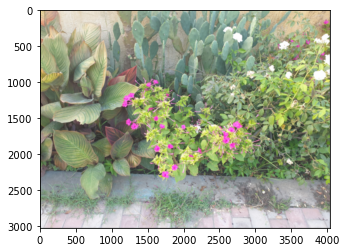

In [1]:
import cv2 as cv
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline

img_orig = cv.imread('./data/flowers_blur.png')

plt.imshow(cv.cvtColor(img_orig,cv.COLOR_BGR2RGB))
plt.show()

<p style='direction:rtl; text-align: right'>
از آنجایی که در کانوالو کردن، جا به جایی مجاز است، لاپلاسین تابع گوس را با استفاده از روابط مشتق حساب میکنیم و آنا را در نقاط مختلف فیلتر تقریب میزنیم.
تابع زیر با داشتن انحراف معیار و مکان، خروجی LoG را در هر نقطه خروجی می‌دهد.
</p>

$$ LoG_{\sigma}(x,y) = \frac{x^2+y^2-2\sigma^2}{2\pi \cdot \sigma^6}\cdot \exp(-\frac{x^2+y^2}{2\sigma^2}) $$

In [2]:
def laplacian_of_gaussian(x, y, sigma: float):
    return (x ** 2 + y ** 2 - 2 * sigma ** 2) \
           * math.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2)) \
           / (2 * math.pi * sigma ** 6)

<p style='direction:rtl; text-align: right'>
تابع زیر، یک فیلتر LoG با سایز داده شده تولید میکند. میانگین فیلتر را روی صفر می بریم تا روشنایی تصویر را تغییر چندانی ندهد.
</p>

In [3]:
def unsharp_filter(ksize: int, sigma: float):
    res = np.zeros((ksize, ksize))
    for i in range(-ksize // 2, ksize // 2 + 1):
        for j in range(-ksize // 2, ksize // 2 + 1):
            res[i + ksize // 2][j + ksize // 2] = laplacian_of_gaussian(j, i, sigma)
    return res - res.mean()

<p style='direction:rtl; text-align: right'>
تابع کمکی زیر، از عکس ورودی یک فیلتر آنشارپ میسازد و با ضریب داده شده، با عکس جمع میکند.
</p>

In [4]:
def sharpen(src, coef, ksize, sigma):
    flt = unsharp_filter(ksize, sigma)
    src = src.astype(np.float)
    lap = cv.filter2D(src, -1, flt).astype(float)
    res = np.clip(src + coef * lap, 0, 255).astype(np.uint8)
    return res, lap

<p style='direction:rtl; text-align: right'>
در نهایت با توابع تعریف شده، عکس را شارپ‌تر میکنیم.
برای نمایش فیلتر، از آنجایی که فیلتر مقادیر و مثبت و منفی را همراه با هم دارد،
میانگین را روی ۱۲۷ می‌بریم تا هم مثبت و هم منفی قابل دیدن باشد.
</p>
<p style='direction:rtl; text-align: right'>
ضریب آلفا را ۲۰-، انحراف معیار را ۰.۷۳ و سایز کرنل را ۵ در نظر میگیریم.
</p>

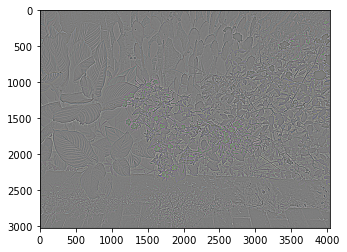

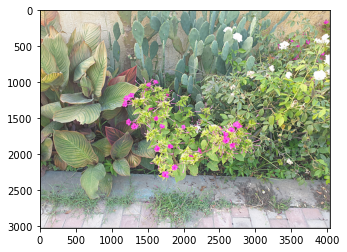

In [5]:
m_coef = -20
m_ksize = 5
m_sigma = 0.73

img, lapped = sharpen(img_orig, m_coef, m_ksize, m_sigma)


def normalize_image(src):
    src = src.copy().astype(float)
    src -= src.mean()
    src /= src.std()
    src *= 50
    src += 127
    return np.clip(src, 0, 255).astype(np.uint8)

plt.imshow(cv.cvtColor(normalize_image(lapped), cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()